# Identifying Fraud from Enron Financial and Email Data

<img src="images/logo.jpg">

## 1. Context

Enron was an energy, commodities and services company that in 2000 was one of the largest companies in the United States, with almost 20,000 staff and claimed revenues of nearly $101 billion dollars. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud, known since as the <a href="https://en.wikipedia.org/wiki/Enron_scandal">Enron Scandal</a>. In the resulting Federal investigation, a significant amount of typically confidential information entered the public record, including emails and financial data for top executives. Many these executives were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

## 2. Introduction

This document presents the results of a project that applies machine learning techniques to Enron financial and email data to identify persons of interest (POI) that were investigated by the government of the United States for committing fraud. These POI may have been indicted, settled without admitting guilt or testified in exchange for immunity. Supervised learning algorithms such as Naive Bayes, Decision Tree and K Nearest Neighbor (KNN) and Logistic classification are trained to predict the POIs and later tuned to increase the performance of the predictions using several techniques such as feature selection, feature scaling and parameter tuning.

The organization of the document is as follows:

<ol>
<li>Context</li>
<li>Introduction</li>
<li>Objective</li>
<li>Methodology</li>
<li>Understanding Enron financial and email dataset</li>
<li>Model estimation</li>
<li>Feature selection optimization and fine tuning algorithms</li>
<li>Conclusion</li>
</ol>

## 3. Objective
<ul>
<li><b><i>Train and tune a machine learning algorithm that can predict which employees from Enron are "Persons of Interest" using financial and email data.</i></b></li> 
<ul>

## 4. Methodology

The project was conducted in a seven steps as shown in the figure below. 

<img src="images/methodology.jpg">

<ol>
<li><b>Exploratory data analysis:</b> dimensions of data, identification of NaNs, exploration of extreme values, descriptive statistics and plotting possible relationships.</li>
<li><b>Data cleaning:</b> substitution of NaNs for zeros and removal of outliers considered non persons.</li>
<li><b>New feature engineering:</b> Creation of two additional variables from the existing data.</li>
<li><b>Algorithm selection:</b> Supervised learning classifiers such as Naive Bayes, Decision Tree, Logistic Regression and K-Nearest Neighbors.</li>
<li><b>Model optimization:</b> Scaling with minimum and maximum method, feature selection using select K-best parameters method, parameter optimization using grid search algorithm, and cross validation using stratified K-Fold method.</li>
</ol>

The data analysis and machine learning engineering process was conducted in Python. The main libraries used in this project were the following:

<ul>
<li><b>Data analysis:</b> numpy, pandas</li>
<li><b>Data processing:</b> pickle</li>
<li><b>Data visualization:</b> seaborn, matplotlib</li>
<li><b>Machine learning:</b> sklearn</li>
</ul>

The datasets were downloaded from <a href='https://www.cs.cmu.edu/~./enron/'>Carnegie Mellon Computer Science Department</a>:
<ul>
<li>Financial data by employee</li>
<li>Email data</li>
</ul>

The following code loads the packages necessary to execute the data analysis and processing.

In [22]:
#!/usr/bin/python
import sys
import pickle
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier
import pprint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 5. Understanding Enron financial and email dataset

In this section an initial data exploration is conducted to familiarize with the dataset.

The Enron financial and email data contains the following <b>fields by employee</b>:

<ul>
<li><b>POI labels:</b> boolean, True if POI and False if not POI.
<li><b>Financial data features (integers): </b>salary, bonus, long term incentive, deferred income, deferral payments, loan advances, other, expenses, director fees, total payments, exercised stock options, restricted stock, restricted stock deferred, total stock value
<li><b>Email data features (integers): </b>to messages, from poi to this person, from messages, from this person to poi, shared receipt with poi</li>
</ul>

<b>a) Dimensions of the dataset: </b>

The dataset contains 146 rows and 20 variables.

In [23]:
# features_list is a list of strings, each of which is a feature name.
# The first feature must be "poi".
features_list = ['poi','salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees','total_payments','exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value','to_messages','from_poi_to_this_person','from_messages','from_this_person_to_poi','shared_receipt_with_poi']
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

employees = pd.Series(list(data_dict.keys()))
formattedData = featureFormat(data_dict, features_list, remove_NaN=False, remove_all_zeroes=False, remove_any_zeroes=False, sort_keys = True)
formattedDataDf = pd.DataFrame(formattedData)
formattedDataDf.columns = features_list
print 'Dimensions of dataset (Rows, Cols): ', formattedDataDf.shape

Dimensions of dataset (Rows, Cols):  (146, 20)


<b>b) Exploration of NaNs:</b>

A quick view to the first five rows of the Enron Data show that most of the fields contain NaNs.

In [24]:
formattedDataDf.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
0,0.0,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,NaN,152.0,13868.0,NaN,4484442.0,1729541.0,126027.0,-126027.0,1729541.0,2902.0,47.0,2195.0,65.0,1407.0
1,0.0,NaN,NaN,NaN,NaN,178980.0,NaN,NaN,3486.0,NaN,182466.0,257817.0,NaN,NaN,257817.0,NaN,NaN,NaN,NaN,NaN
2,0.0,477.0,NaN,NaN,-5104.0,NaN,NaN,864523.0,56301.0,NaN,916197.0,4046157.0,1757552.0,-560222.0,5243487.0,566.0,39.0,29.0,0.0,465.0
3,0.0,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,NaN,2660303.0,11200.0,NaN,5634343.0,6680544.0,3942714.0,NaN,10623258.0,NaN,NaN,NaN,NaN,NaN
4,0.0,239671.0,400000.0,NaN,-201641.0,260455.0,NaN,69.0,129142.0,NaN,827696.0,NaN,145796.0,-82782.0,63014.0,NaN,NaN,NaN,NaN,NaN


<b>The following table shows the 20 fields in the database and the number of NaNs present</b>. It can be seen that all fields except POI contain NaNs. In particular the top 5 fields with most NaNs are loan_advances, director_fees, restricted_stock_deferred, deferal_payments and deferral_payments. These fields have NaNs in more than 60% of the observations. In part, this is due to the fact that these employees do not have a value in the mentioned fields.

In [25]:
numberOfNans = formattedDataDf.isnull().sum()
percentageOfNansInCol = (formattedDataDf.isnull().sum() / 146) * 100

nanResults  = {'Percentage_of_NaNs_from_Total': percentageOfNansInCol, 'Total_NaNs': numberOfNans,}
nansDf = pd.DataFrame(nanResults)
nansDf.sort_values(by='Total_NaNs', ascending=False)

,Percentage_of_NaNs_from_Total,Total_NaNs
loan_advances,97.260274,142
director_fees,88.356164,129
restricted_stock_deferred,87.671233,128
deferral_payments,73.287671,107
deferred_income,66.438356,97
long_term_incentive,54.794521,80
bonus,43.835616,64
shared_receipt_with_poi,41.095890,60
to_messages,41.095890,60
from_this_person_to_poi,41.095890,60


NaNs must be cleaned before proceeding to the analysis.

<b>c) Exploration of extreme values:</b>

When ordering the dataset in salary descending order, a total entry was found. This is entry is an outlier that must be removed from the dataset.

In [26]:
formattedDataDf.sort_values('salary',ascending=False).head(3)

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
130,0.0,26704229.0,97343619.0,48521928.0,-27992891.0,32083396.0,83925000.0,42667589.0,5235198.0,1398517.0,309886585.0,311764000.0,130322299.0,-7576788.0,434509511.0,NaN,NaN,NaN,NaN,NaN
122,1.0,1111258.0,5600000.0,1920000.0,NaN,NaN,NaN,22122.0,29336.0,NaN,8682716.0,19250000.0,6843672.0,NaN,26093672.0,3627.0,88.0,108.0,30.0,2042.0
79,1.0,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,103559793.0,34348384.0,14761694.0,NaN,49110078.0,4273.0,123.0,36.0,16.0,2411.0


This initial exploratory analysis showed the presence of NaNs and outliers that will have to be cleaned from the dataset in the following section.

<b>d) Removal of outliers:</b>

In this section an initial selection of features is conducted and then cleaned. Outliers are removed and new features are created and added to the dataset.

In [27]:
# features_list is a list of strings, each of which is a feature name.
# The first feature must be "poi".

#features_list = ['poi','bonus','exercised_stock_options','fraction_from_poi_messages']
#features_list = ['poi','salary','bonus','long_term_incentive','exercised_stock_options','restricted_stock','fraction_to_poi_messages','fraction_from_poi_messages']
#features_list = ['poi','total_payments','total_stock_value','fraction_to_poi_messages','fraction_from_poi_messages']
features_list = ['poi','salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees','exercised_stock_options','restricted_stock','restricted_stock_deferred','fraction_to_poi_messages','fraction_from_poi_messages']
# features_list = ['poi','salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees','total_payments','exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value','to_messages','from_poi_to_this_person','from_messages','from_this_person_to_poi','shared_receipt_with_poi','fraction_to_poi_messages','fraction_from_poi_messages']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

For the purposes of this analysis only other entries different to persons were considered outliers and removed from the dataset. Previously, a TOTAL entry was found but also a new outlier was identified, THE TRAVEL AGENCY IN THE PARK entry. These two were removed from the data.

In [28]:
data_dict.pop('TOTAL',0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

<b>e) Engineering of new features:</b>

Two additional features were created:
<ul>
<li>Fraction of emails written to POI from total written emails.</li>
<li>Fraction of emails received from POI from total received emails.</li>
</ul>

The rational for including this features in the project is that in some sense they reduce the dimensionality of the emails data and also these relative measurements sort of normalize this information across the rest of the employees.


In [33]:
for name in data_dict:
    from_poi_to_this_person = data_dict[name]['from_poi_to_this_person']
    to_messages = data_dict[name]['to_messages']
    
    if from_poi_to_this_person == 'NaN' or to_messages == 'NaN':
        data_dict[name]['fraction_to_poi_messages'] = 0
    else:
        data_dict[name]['fraction_to_poi_messages'] = float(from_poi_to_this_person) / float(to_messages)

    from_this_person_to_poi = data_dict[name]['from_this_person_to_poi']
    from_messages = data_dict[name]['from_messages']

    if from_this_person_to_poi == 'NaN' or from_messages == 'NaN':
        data_dict[name]['fraction_from_poi_messages'] = 0
    else:
        data_dict[name]['fraction_from_poi_messages'] = float(from_this_person_to_poi) / float(from_messages)
        
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

<b>f) Descriptive statistics of the dataset:</b>

After cleaning the data and introducing new features, the dimensions of the Enron dataset are 143 rows and 15 columns. 

From the list of 143 employees only 18 (12.5%) are POIs and 125 (87.4%) are not POIs. Therefore, it can be concluded that <b><i>the dataset shows the class (POI) imbalance problem, 18 POI to 125 non-POI. This is an issue as most of Machine Learning algorithms work best when instances of each class are equally balanced</i></b>.

In [34]:
### Data exploration
df = pd.DataFrame(data)
df.columns = features_list
print 'Number of Rows and Columns: ', df.shape
print '\nPOIs: ', df.poi.sum()
print 'non-POIs: ', df['poi'].size - df.poi.sum()
print '\nfeatures: ', len(features_list)-1
print '\nfeatures list: ', features_list[1:len(features)]

Number of Rows and Columns:  (143, 15)

POIs:  18.0
non-POIs:  125.0

features:  14

features list:  ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'fraction_to_poi_messages', 'fraction_from_poi_messages']


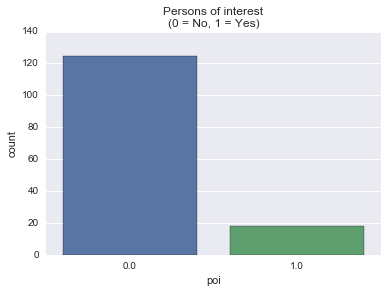

In [177]:
sns.countplot(df.poi)
plt.title("Persons of interest\n(0 = No, 1 = Yes)")
plt.show()

Considering the POI label and the 14 features included in the dataset a "scatter plot matrix" was created to visualize the distribution of the each of the variables with the purpose of identifying patterns in the data. In the diagonal of the matrix the kernel distribution estimated of each variable can be found, whereas in the other cells of the matrix a scatter plot of 2D is shown for each variable against the rest.

The results reveal that none of the variables behave like a normal distribution, and in general there are no clear positive or negative associations. Also, almost all of the variables show an unequal distribution of values due to the presence of very extreme values.

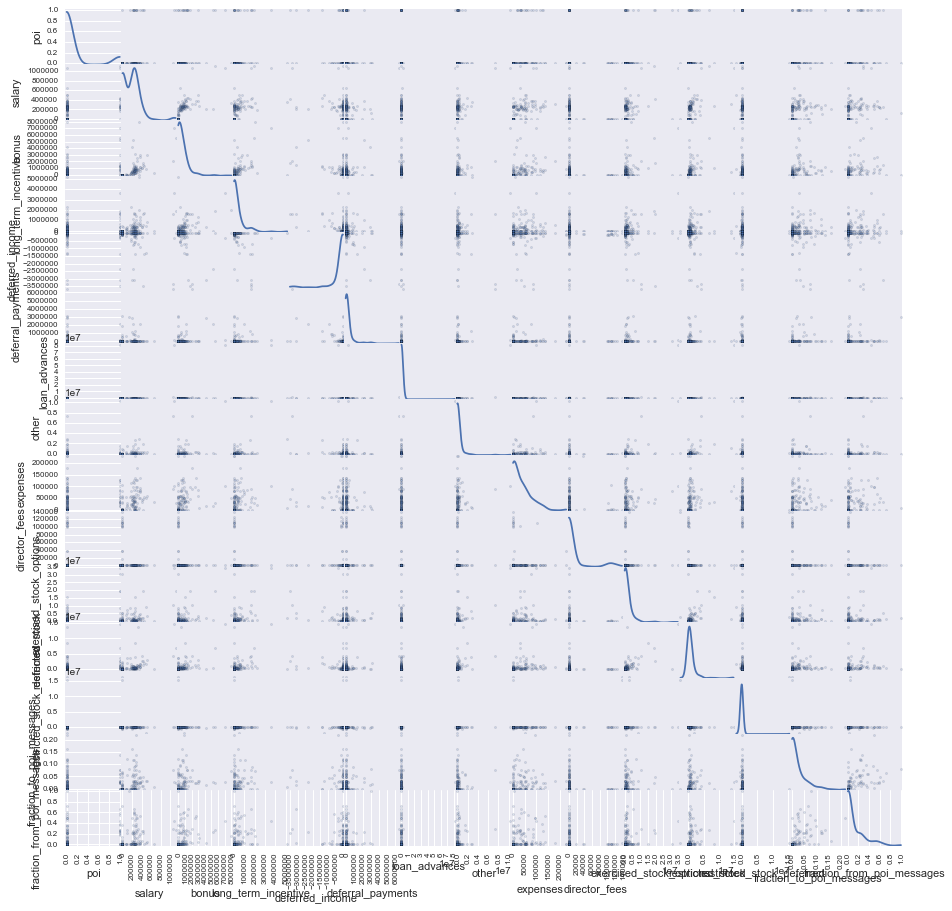

In [178]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

In this section an exploratory data analysis was conducted to get a sense of the Enron financial and email data. The dataset used for the analysis was cleaned from NaNs and outliers. The labels indicating persons of interest and the features were described using visualization methods. In particular it was found that none of these variables have a normal distribution and that they have extreme values. Such values were not removed as they play an important role in identifying persons of interest that may have been subject of fraud investigation. Also, it was found that the POI class is underrepresented as it is the 12.5% of all employees included in the data compared with the non-POI that account to 87.4% of the total. In the next section an exercise of fitting different classifiers is conducted using the information described above.

## 6. Model estimations

The problem that is being tried to solve is the classification of POI/non-POI using financial and email data. It is worth to mention that the data acquired is already classified. Therefore, the solution approach is based on supervised learning algorithms that will use a portion of the data to learn its underlying patterns so it can predict the rest of the unseen data. The proposed classification algorithms used are Naive Bayes, Decision Tree, Logit Model and K-Nearest Neighbors (KNN).

Furthermore, the metrics used to evaluate and compare each of the fitted algorithms are accuracy score, precision score, recall score and F score. The following code defines a group of functions to facilitate the evaluation and comparison of the algorithms performance.

In [179]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

# Defines a function that returns a dictionary containing the results of comparing the predicted vs the observed labels.
def modelEvaluation(prediction, real_observations):
    accuracyScore = accuracy_score(prediction, real_observations)
    precisionScore = precision_score(prediction, real_observations)
    recallScore = recall_score(prediction, real_observations)
    f1Score = f1_score(prediction, real_observations)
    confusion = confusion_matrix(prediction, real_observations)
    
    results = {'Accuracy_score': accuracyScore,
               'Precision_score': precisionScore, 
               'Recall_score': recallScore, 
               'F_score': f1Score,
               'Predictions':len(labels_test),
               'True positives': confusion[1,1],
               'True negatives': confusion[0,0],
               'False positives': confusion[0,1],
               'False negatives': confusion[1,0]
              }
    return results
# Defines a function that returns a dataframe containing the results for all the fitted models.
def finalResults(results):
    cols = ['Accuracy_score','Precision_score','Recall_score','F_score','Predictions','True positives','False positives','False negatives','True negatives']
    final_results = pd.DataFrame(results,cols).transpose()
    final_results = final_results.sort_values('F_score',ascending=False)
    return final_results

<b>Dataset split in training and testing sets</b>

The first step in the fitting process was splitting the original dataset into training and testing sets. <b><i>The purpose of splitting the original dataset was to prevent building an overfitted model; that means that the model will maximize its performance based on all the observed data but will likely perform bad when predicting with unseen information</i></b>. Therefore, splitting the set in two allows to use one set to train the model and another to test the performance of the model.

The method used for splitting the data was the train_test_split in sklearn package. The training set represents 70% of the employees in the dataset and the testing set represents 30% of the dataset.

In [180]:
# Step 1: Split data
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

The following code shows how each of the four classifiers are trained using the training features and labels split. Then the fitted classifiers are used to predict the label class which in this case is POI=1 or non-POI=0.

<b>a) Naive Bayes</b>

In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
NB_results = modelEvaluation(pred, labels_test)

<b>b) Decision Tree</b>

In [183]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
DT_results = modelEvaluation(pred, labels_test)

<b>c) Logit Regression</b>

In [185]:
from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression()
clf_logit.fit(features_train,labels_train)
pred = clf_logit.predict(features_test)
LogitResults = modelEvaluation(pred, labels_test)

<b>d) K-Nearest Neighbors</b>

In [187]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
K_NNResults = modelEvaluation(pred, labels_test)

<b>Results for initial model estimations</b>

The following table presents the results of prediction of the four classifiers using the testing features set (sample=43). The metrics used to compare the models were accuracy, precision, recall and F scores. Also the number of True Positives, False Positives, False Negatives and True Negatives are shown. The metrics were calculated using the prediction and the testing labels. 

It can be seen that considering the accuracy score, K-Nearest Neighbors and Decision Tree offer the best results. However, looking at the number of True Positives predicted both classifiers fail to identify at least one POI from the 5 available in the testing set. Therefore, their precision score is zero. In this sense, Naive Bayes and Logit Regression were better at predicting true positives.

In [189]:
results = {'Naive Bayes': NB_results, 'Decision Tree': DT_results, 'Logit': LogitResults, 'KNN': K_NNResults}
finalResults(results)

,Accuracy_score,Precision_score,Recall_score,F_score,Predictions,True positives,False positives,False negatives,True negatives
Naive Bayes,0.790698,0.6,0.3,0.400000,43.0,3.0,2.0,7.0,31.0
Logit,0.744186,0.4,0.2,0.266667,43.0,2.0,3.0,8.0,30.0
Decision Tree,0.837209,0.0,0.0,0.000000,43.0,0.0,5.0,2.0,36.0
KNN,0.883721,0.0,0.0,0.000000,43.0,0.0,5.0,0.0,38.0


The preliminary results showed that none of the classifiers were good enough to predict persons of interest. It is worth to mention that this results could be the result of using the given split of data. Therefore, the following section applies optimization and cross validation techniques to test the robustness of each classifier.

## 7. Feature selection optimization and fine tuning algorithms
The objective of this section was to use the training set to fit the same classifiers trying with different set of features, scaled features, different parameters and using cross validation techniques to identify the best possible classifier for each learning algorithm.

<b><i>In this section the validation process is conducted using cross-validation instead of the train-test split as the results of the latter are high variance meaning that they depend on the elements arrangement of the two sets.</i></b> Therefore, cross-validation allow us to run the model in K different splits where all observations are used to train and test and the performance metrics are averaged to reduce the high variance.

The cross validation technique applied in this stage is stratified shuffle split with 10 splits. This means that the orginal sample was splitted 10 times in training and testing sets. Also, that the model was run in the 10 splits and the final performance metric is the average of the performance metrics of the 10 splits.

In order to conduct the optimization, process several times, the process is systematized using a Pipeline with the following steps:
<ol>
<li>Scaling features using the minimum and maximum method.</li>
<li>Conducting feature selection using Select K Best.</li>
<li>Fitting classifier</li>
</ol>

In this sense, parameter tuning was executed using Grid Search. Different sets of parameters for each classifier were tried. Stratified K-Fold cross validation was conducted for 10 splits. The best combination of features and parameters per classifier is chosen to predict the POIs using the testing set.

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif

<b>a) Naive Bayes</b>

The Naive Bayes classifier is one of the simplest algorithms as it does not have parameters to be tuned. Therefore, to optimize the performance of the classifier the number of features is varied, until the classifier with the best performance is found.

In [191]:
# Step 1: Split the data in training and testing set(see above)

# Step 2: Make pipeline
pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kbest',SelectKBest()),
        ('clf', GaussianNB())
    ])

# Step 3: Set parameters list
k_features = range(1,len(features_list))
param_grid = {'kbest__k': k_features}

#Step 4: Make cross validation iterator
#sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.1, train_size=None, random_state=42)
# Stratified KFold set to 10 folds

# Step 5: Make the GridSearchCV object clf with the paramters set above: pipeline, param_grid, sss
gridNB = GridSearchCV(estimator = pipeline,
                             param_grid = param_grid,
                             scoring = 'f1',
                             cv= 10)

# Step 6: Do training and cross validation with clf (fit to the data)
gridNB.fit(features_train,labels_train)
#pprint.pprint(grid.cv_results_) 

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x1282c62a8>)), ('clf', GaussianNB(priors=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

The best Naive Bayes classifier used four of the fourteen features: salary, bonus, exercised stock options and fraction of emails from POIs.

In [192]:
# Step 6.1: Get the set of best parameters and features
print '\nBest parameters chosen from the grid:'
pprint.pprint(gridNB.best_params_)
features_selected = [features_list[i+1] for i in gridNB.best_estimator_.named_steps['kbest'].get_support(indices=True)]
print 'The Features Selected by SKB - GS:'
pprint.pprint(features_selected)


Best parameters chosen from the grid:
{'kbest__k': 4}
The Features Selected by SKB - GS:
['salary', 'bonus', 'exercised_stock_options', 'fraction_from_poi_messages']


The following graph displays the mean scores for each feature using NB classifier. It can be seen that the bonus variable is the most powerful to predict POIs, then salary and fraction of email messages from POIs, and finally exercised stock options.

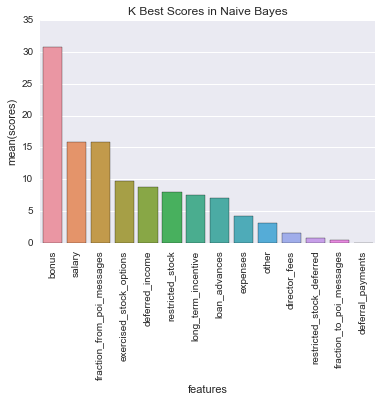

In [193]:
f = features_list[1:]
s = gridNB.best_estimator_.named_steps['kbest'].scores_
results = {'features':f,'scores': s}
selectKBestScores = pd.DataFrame(results).sort_values('scores',ascending=False)
sns.barplot(x=selectKBestScores.features, y=selectKBestScores.scores)
plt.title("K Best Scores in Naive Bayes")
plt.xticks(rotation=90)
plt.show()

Considering the four features described above the best NB classifier is estimated and used to predict POIs.

In [194]:
# Step 6.2: Get best estimator
clf = gridNB.best_estimator_

In [195]:
# Step 7: Predict with testing set
pred = clf.predict(features_test)
tunedNaiveBayes = modelEvaluation(pred, labels_test)
#test_classifier(clf, my_dataset, features_list)

<b>b) Decision Tree</b>

Using the same logic here the Decision Tree is optimized using different set of features and parameters. The tuned parameters are the decision tree strategy to split each node using the best strategy to split or a random strategy to split (see details in <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">DT documentation</a>); also the minimum number of samples required to split an internal node is tuned changing the default of two samples to three.

In [196]:
# Step 1: Split the data in training and testing set(see above)

# Step 2: Make pipeline
pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kbest',SelectKBest()),
        ('clf', DecisionTreeClassifier())
        ])

# Step 3: Set parameters list
param_grid = {'kbest__k': k_features,
              'clf__splitter' : ['best','random'], 
              'clf__min_samples_split':[2,3]}

#Step 4: Make cross validation iterator
#sss = StratifiedShuffleSplit(n_splits=20, test_size=0.1, train_size=None, random_state=None)

# Step 5: Make the GridSearchCV object clf with the paramters set above: pipeline, param_grid, sss
gridDT = GridSearchCV(estimator = pipeline,
                             param_grid = param_grid,
                             scoring = 'f1',
                             cv= 10)

# Step 6: Do training and cross validation with clf (fit to the data)
gridDT.fit(features_train,labels_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x1282c62a8>)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'clf__splitter': ['best', 'random'], 'clf__min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

The parameters of the best classifier are a minimum number of 2 sample slits and a random strategy to split nodes. 

In [197]:
# Step 6.1: Get the set of best parameters
print '\nBest parameters chosen from the grid:'
pprint.pprint(gridDT.best_params_)


Best parameters chosen from the grid:
{'clf__min_samples_split': 3, 'clf__splitter': 'random', 'kbest__k': 11}


The best classifier is obtained using only the bonus as a feature.

In [198]:
# Step 6.2: Get best estimator feature importances
features_selected = [features_list[i+1] for i in gridDT.best_estimator_.named_steps['kbest'].get_support(indices=True)]
print 'The Features Selected by SKB - GS:'
pprint.pprint(features_selected)

The Features Selected by SKB - GS:
['salary',
 'bonus',
 'long_term_incentive',
 'deferred_income',
 'loan_advances',
 'other',
 'expenses',
 'director_fees',
 'exercised_stock_options',
 'restricted_stock',
 'fraction_from_poi_messages']


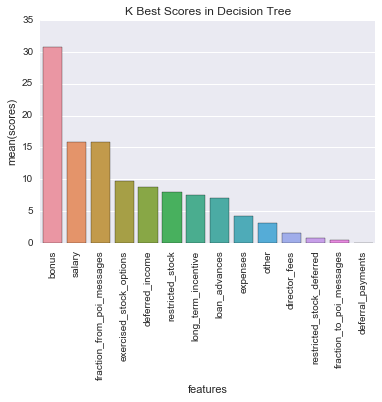

In [199]:
f = features_list[1:]
s = gridDT.best_estimator_.named_steps['kbest'].scores_
results = {'features':f,'scores': s}
selectKBestScores = pd.DataFrame(results).sort_values('scores',ascending=False)
sns.barplot(x=selectKBestScores.features, y=selectKBestScores.scores)
plt.title("K Best Scores in Decision Tree")
plt.xticks(rotation=90)
plt.show()

The best Decision Tree classifier is estimated and used to predict POIs.

In [200]:
# Step 6.3: Get best estimator
clf_final = gridDT.best_estimator_

In [201]:
# Step 7: Predict with testing set
pred = clf.predict(features_test)
tunedDecisionTree = modelEvaluation(pred, labels_test)
#test_classifier(clf_final, my_dataset, features_list)

<b>c) Logit Regression</b>

In the logit regression besides the feature selection the following parameters are tuned. Inverse of regularization strength (C) and the algorithm to use in the optimization problem (solver). For more details about the parameters see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">documentation</a>.

In [202]:
# Step 1: Split the data in training and testing set(see above)

# Step 2: Make pipeline
pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kbest',SelectKBest()),
        ('clf', LogisticRegression())
        ])

# Step 3: Set parameters list
param_grid = {'kbest__k': k_features,
              'clf__C' : [1,1.1,1.2,1.3,1.4, 1.5,1.6,1.7,1.8,1.9,2], 
              'clf__solver':['liblinear','sag']}

#Step 4: Make cross validation iterator
#sss = StratifiedShuffleSplit(n_splits=20, test_size=0.1, train_size=None, random_state=None)

# Step 5: Make the GridSearchCV object clf with the paramters set above: pipeline, param_grid, sss
gridLogit = GridSearchCV(estimator = pipeline,
                             param_grid = param_grid,
                             scoring = 'f1',
                             cv= 10)

# Step 6: Do training and cross validation with clf (fit to the data)
gridLogit.fit(features_train,labels_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x1282c62a8>)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'clf__C': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2], 'clf__solver': ['liblinear', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

The parameters for the best classifier are a marginal increment in the C feature of 1 to 1.1 and a liblinear solver.

In [203]:
# Step 6.1: Get the set of best parameters
print '\nBest parameters chosen from the grid:'
pprint.pprint(gridLogit.best_params_)


Best parameters chosen from the grid:
{'clf__C': 1.1, 'clf__solver': 'liblinear', 'kbest__k': 10}


The best classifier is obtained using the following set of features: salary, bonus, long_term_incentive, deferred income, loan_advances, other, expenses, exercised stock options, restricted stock and fraction from POI messages.

In [204]:
# Step 6.2: Get best estimator
features_selected = [features_list[i+1] for i in gridLogit.best_estimator_.named_steps['kbest'].get_support(indices=True)]
print 'The Features Selected by SKB - GS:'
pprint.pprint(features_selected)

The Features Selected by SKB - GS:
['salary',
 'bonus',
 'long_term_incentive',
 'deferred_income',
 'loan_advances',
 'other',
 'expenses',
 'exercised_stock_options',
 'restricted_stock',
 'fraction_from_poi_messages']


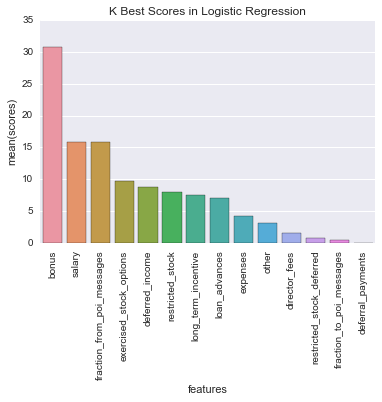

In [205]:
f = features_list[1:]
s = gridLogit.best_estimator_.named_steps['kbest'].scores_
results = {'features':f,'scores': s}
selectKBestScores = pd.DataFrame(results).sort_values('scores',ascending=False)
sns.barplot(x=selectKBestScores.features, y=selectKBestScores.scores)
plt.title("K Best Scores in Logistic Regression")
plt.xticks(rotation=90)
plt.show()

The best Logit Regression classifier is estimated and used to predict POIs.

In [206]:
# Step 6.3: Get best estimator
clf = gridLogit.best_estimator_

In [207]:
# Step 7: Predict with testing set
pred = clf.predict(features_test)
tunedLogit = modelEvaluation(pred, labels_test)
#test_classifier(clf, my_dataset, features_list)

<b>d) K-Nearest Neighbors</b>

In the K-Nearest Neighbors classifier besides the feature selection the following parameters are tuned. The number of neighbors used for the classification ranging from 4 to 7. Also the the weight function used in prediction. (See <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">documentation</a>).

In [208]:
# Step 1: Split the data in training and testing set(see above)

# Step 2: Make pipeline
pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kbest',SelectKBest()),
        ('clf', KNeighborsClassifier())
        ])
# Step 3: Set parameters list
param_grid = {'kbest__k': k_features,
              'clf__n_neighbors' : [4,5,6,7], 
              'clf__weights':['uniform','distance']}

#Step 4: Make cross validation iterator
#sss = StratifiedShuffleSplit(n_splits=20, test_size=0.1, train_size=None, random_state=None)

# Step 5: Make the GridSearchCV object clf with the paramters set above: pipeline, param_grid, sss
gridKNN = GridSearchCV(estimator = pipeline,
                             param_grid = param_grid,
                             scoring = 'f1',
                             cv= 10)

# Step 6: Do training and cross validation with clf (fit to the data)
gridKNN.fit(features_train,labels_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x1282c62a8>)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'clf__weights': ['uniform', 'distance'], 'clf__n_neighbors': [4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

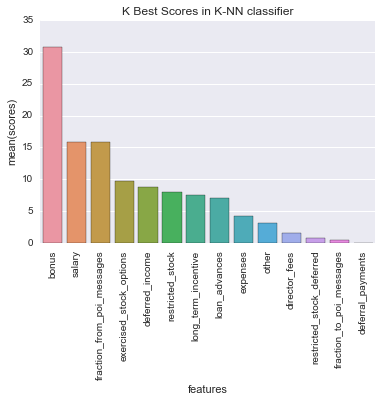

In [209]:
f = features_list[1:]
s = gridKNN.best_estimator_.named_steps['kbest'].scores_
results = {'features':f,'scores': s}
selectKBestScores = pd.DataFrame(results).sort_values('scores',ascending=False)
sns.barplot(x=selectKBestScores.features, y=selectKBestScores.scores)
plt.title("K Best Scores in K-NN classifier")
plt.xticks(rotation=90)
plt.show()

In [210]:
# Step 6.1: Get the set of best parameters
print '\nBest parameters chosen from the grid:'
pprint.pprint(gridKNN.best_params_)


Best parameters chosen from the grid:
{'clf__n_neighbors': 4, 'clf__weights': 'distance', 'kbest__k': 1}


The best K-NN classifier was estimated and used to predict POIs.

In [211]:
# Step 6.2: Get best estimator
clf = gridKNN.best_estimator_

In [212]:
# Step 7: Predict with testing set
pred = clf.predict(features_test)
tunedKNN = modelEvaluation(pred, labels_test)
#test_classifier(clf, my_dataset, features_list)

<b>Final results for fine-tuned algorithms</b>

The following table presents the results of prediction for the four fine-tuned classifiers using the testing features set (sample=43). The metrics used to compare the models are accuracy, precision, recall and F scores. Also the number of True Positives, False Positives, False Negatives and True Negatives are shown. The metrics are calculated using the prediction and the testing labels.

In comparison with the first estimation of the classifiers it can be seen that the Decision Tree (DT) and the Naive Bayes (NB) offer the best results. Recall and precision scores are improved. Moreover, both classifiers are the only ones that can predict the most number of true positives.

It is also worth to point out that after tuning all the classifiers the number of false positives and false negatives are minimized.

In [213]:
results = {'Naive Bayes': tunedNaiveBayes, 'Decision Tree': tunedDecisionTree, 'Logit': tunedLogit, 'KNN': tunedKNN}
finalResults(results)

,Accuracy_score,Precision_score,Recall_score,F_score,Predictions,True positives,False positives,False negatives,True negatives
Decision Tree,0.883721,0.6,0.5,0.545455,43.0,3.0,2.0,3.0,35.0
Naive Bayes,0.883721,0.6,0.5,0.545455,43.0,3.0,2.0,3.0,35.0
Logit,0.906977,0.2,1.0,0.333333,43.0,1.0,4.0,0.0,38.0
KNN,0.860465,0.0,0.0,0.000000,43.0,0.0,5.0,1.0,37.0


The accuracy of DT and NB is of 90%; however, this is not the most appropriate metric in the light that there are very few POIs in the dataset, and therefore in the testing set. Meaning that the accuracy score is kind of biased in the sense that it is praising the prediction of true negatives, and that is not exactly the purpose of the project.

To overcome the accuracy issue, the precision score and recall score play a better role for interpretation. A recall score of 0.5 says that our models correctly predict 50% of the time POIs that are in fact POIs. Moreover, the precision score of 0.6 means that both classifiers are able to correctly predict 60% of POIs from all those employees that were predicted as POI. Overall, the precision score is better than the recall score meaning that whenever a POI gets flagged in the test set, I know with confidence that it is very likely to be a real POI and not a false alarm. Both classifiers reached a F score of 55% of flagging a POI when it is a POI and not flagging a POI when it is not a POI.

## 8. Conclusion

The purpose of this project was to build a supervised learning algorithm capable of using Enron financial and email data to predict which of the employees are Persons of Interest and which are not. Four algorithms were tested and optimized and Naive Bayes and Decision Tree classifier offered the best results. They both achieved a precision and recall score of 0.6 and 0.5 respectively. It could be argued that such metrics are not high enough, however the results are good enough considering that the dataset contained very few observations of POIs, 12.5% from the total.